<a href="https://colab.research.google.com/github/sudiksha301200/m/blob/main/Dominanat_colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing packages required 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

In [ ]:
#Defining the no. of clusters for the KMeans algorithm
clusters = 5

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow
uploaded = files.upload()
img = cv2.imread('2.png') #read input image 
orgn_img = img.copy() #copy for future refrence
print('Org image shape --> ',img.shape) #prints shape

Saving 2.png to 2 (2).png
Org image shape -->  (1932, 2835, 3)


In [ ]:
#Resizing our image to get results fast
img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

After resizing shape -->  (200, 293, 3)


In [ ]:
#Flatten the image
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

After Flattening shape -->  (58600, 3)


In [ ]:
#Making a KMeans Clustering object
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

KMeans(n_clusters=5, random_state=0)

In [ ]:
#extract these cluster centers
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

In [ ]:
#calculating the dominance of each dominant color
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

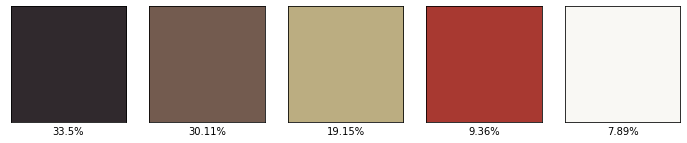

In [ ]:
#plotting blocks of dominant colors
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], <a list of 0 Text major ticklabel objects>)

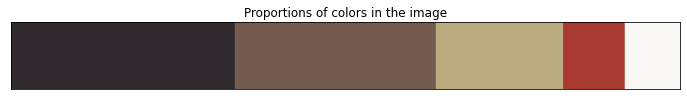

In [ ]:
#plotting a bar
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])